Постройте три модели  для прогнозирования цены квартир:
 
1.на основе количества метров;\
2.на основе расстояния до метро;\
3.на основе квадратных метров & расстояния до метро;

Далее:\
1.Для 1 и 2-го случая отобразите на графике исходные и прогнозные значения.\
2.Сравните исходные и прогнозные значения с помощью метрик качества (всех упомянутых в презентации 12 метрик для всех моделей).


In [65]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
%matplotlib inline

In [66]:
import os
os.chdir("/Users/egorgusev/Анализ данных/data_mining_spbu/HW8")

In [67]:
df = pd.read_csv('FLATS.csv', sep=';', encoding='Windows-1251')

In [68]:
df.head()

,Id,SQUARE_METERS,METRO_DISTANCE,PRICE
0,601,28,677,7328400
1,602,54,120,9754600
2,603,43,1344,6781500
3,604,33,1003,6784100
4,605,30,591,7296200


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Id              100 non-null    int64
 1   SQUARE_METERS   100 non-null    int64
 2   METRO_DISTANCE  100 non-null    int64
 3   PRICE           100 non-null    int64
dtypes: int64(4)
memory usage: 3.2 KB


In [70]:
df.isna().sum()

Id                0
SQUARE_METERS     0
METRO_DISTANCE    0
PRICE             0
dtype: int64

In [84]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### 1.на основе количества метров

In [98]:
SQUARE_METERS = df['SQUARE_METERS']
y = df['PRICE']

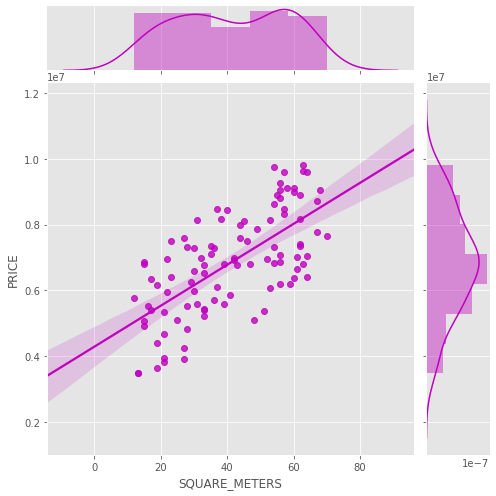

In [99]:
g = sns.jointplot(x='SQUARE_METERS', y='PRICE', data=df,
                  kind="reg", truncate=False,
                  color="m", height=7)

In [100]:
reg1 = linear_model.LinearRegression()
SQUARE_METERS = SQUARE_METERS.values.reshape(-1,1)
reg1.fit(SQUARE_METERS, y)

LinearRegression()

In [103]:
print ('R^2: {0}'.format(reg1.score(SQUARE_METERS, y)))

R^2: 0.45222058564965084


In [110]:
coef = pd.DataFrame(zip(['intercept'] + df.drop(['PRICE', 'Id'] , axis=1).columns.tolist(), [reg1.intercept_] + reg1.coef_.tolist()),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,4.292936e+06
1,SQUARE_METERS,6.214873e+04


### 2.на основе расстояния до метро

In [106]:
METRO_DISTANCE = df['METRO_DISTANCE']

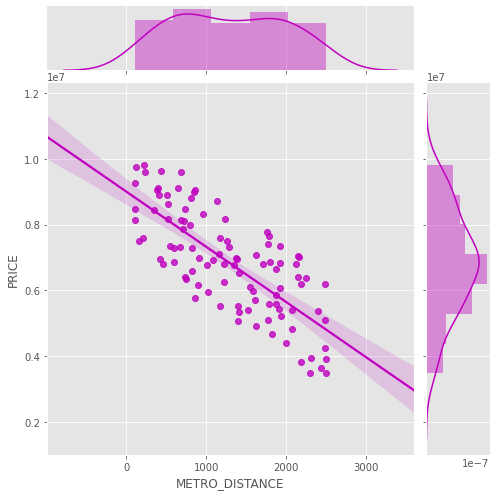

In [107]:
g = sns.jointplot(x='METRO_DISTANCE', y='PRICE', data=df,
                  kind="reg", truncate=False,
                  color="m", height=7)

In [108]:
reg2 = linear_model.LinearRegression()
METRO_DISTANCE = METRO_DISTANCE.values.reshape(-1,1)
reg2.fit(METRO_DISTANCE, y)

LinearRegression()

In [111]:
print ('R^2: {0}'.format(reg2.score(METRO_DISTANCE, y)))

R^2: 0.5775983380546676


In [112]:
coef = pd.DataFrame(zip(['intercept'] + df.drop(['PRICE', 'Id'] , axis=1).columns.tolist(), [reg2.intercept_] + reg2.coef_.tolist()),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,9.003176e+06
1,SQUARE_METERS,-1.679031e+03


### 3.на основе квадратных метров & расстояния до метро

In [113]:
x = df.drop(['PRICE', 'Id'] , axis=1)

In [114]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [115]:
print ('R^2: {0}'.format(model.score(x, y)))

R^2: 0.9774581227423352


In [116]:
coef = pd.DataFrame(zip(['intercept'] + x.columns.tolist(), [model.intercept_] + model.coef_.tolist()),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,6.496840e+06
1,SQUARE_METERS,5.852554e+04
2,METRO_DISTANCE,-1.603460e+03
